In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,r2_score,accuracy_score,precision_score,recall_score

import heejin

In [82]:
df = pd.read_csv('../data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [83]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [84]:
featureDF = df[['sepal.length','sepal.width','petal.length','petal.width']]
targetSR = df['variety']

encoder = LabelEncoder()
encoder.fit(targetSR)

targetSR = encoder.transform(targetSR)
targetSR

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [85]:
for i in featureDF.columns:
    print(targetSR.corr(featureDF[i]))  # sepal.width 제외
featureDF = df[['sepal.length','petal.width','petal.length']]

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

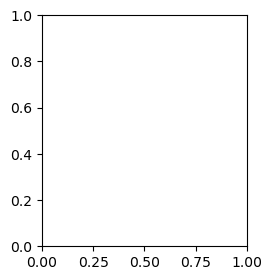

In [86]:
plt.figure(figsize = (9,3))
heejin.print_scatter(1,3,targetSR,featureDF)

In [ ]:
plt.boxplot(featureDF)
plt.xticks(np.arange(1,5), featureDF.columns)
plt.show()

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2,stratify=targetSR)

In [ ]:
heejin.find_poly_p(xtrain,ytrain,xtest,ytest)

In [ ]:
poly = PolynomialFeatures(interaction_only=False, degree=4)
xtrain = poly.fit_transform(xtrain)
xtest = poly.transform(xtest)

In [87]:
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [88]:
heejin.find_re_model(xtrain,ytrain,xtest,ytest,'r2')

----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=7)
scaler : StandardScaler()
Train score : 0.9568877551020408
Test score : 0.9928571428571429

    [모델 설명도]
R2 : 0.9928571428571429
[에러]
MAE : 0.023809523809523805
MSE : 0.0047619047619047615
RMSE : 0.06900655593423542
--------------------------------------
    
model : LinearRegression()
scaler : StandardScaler()
Train score : 1.0
Test score : -26760.118918309036

    [모델 설명도]
R2 : -26760.118918309036
[에러]
MAE : 27.69788369227292
MSE : 17840.74594553936
RMSE : 133.56925524064044
--------------------------------------
    
----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=7)
scaler : MinMaxScaler()
Train score : 0.9568877551020408
Test score : 0.9918367346938776

    [모델 설명도]
R2 : 0.9918367346938776
[에러]
MAE : 0.028571428571428567
MSE : 0.005442176870748298
RMSE : 0.07377111135633174
--------------------------------------
    
model : LinearRegression()
scaler : MinMaxScaler()
Trai

(KNeighborsRegressor(n_neighbors=7), StandardScaler(), 0.9928571428571429)

In [89]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
model = KNeighborsClassifier(n_neighbors=7)
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain),model.score(xtest,ytest)

(0.95, 1.0)

In [97]:
model = LogisticRegression(max_iter=1000)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9666666666666667

In [98]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
ovrmodel = OneVsRestClassifier(model)
ovrmodel.fit(xtrain,ytrain)
ovrmodel.score(xtrain,ytrain),ovrmodel.score(xtest,ytest)

(0.9916666666666667, 0.9666666666666667)

In [99]:
ypre = ovrmodel.predict(xtest)
ovrdf = pd.DataFrame({'Ypre':ypre,'Y':ytest})
ovrdf.replace({0:'Setosa',1:'Versicolor',2:'Virginica'},inplace=True)
ovrdf.head()

,Ypre,Y
59,Versicolor,Versicolor
11,Setosa,Setosa
91,Versicolor,Versicolor
63,Versicolor,Versicolor
41,Setosa,Setosa


In [100]:
classification_report(ytest,ypre,zero_division=1)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.90      0.95        10\n           2       0.91      1.00      0.95        10\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.97      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'

In [101]:
ovomodel = OneVsOneClassifier(model)
ovomodel.fit(xtrain,ytrain)
ovomodel.score(xtrain,ytrain),ovomodel.score(xtest,ytest)

(0.9833333333333333, 0.9666666666666667)

In [102]:
ypre = ovomodel.predict(xtest)
ovodf=pd.DataFrame({'Ypre':ypre,'Y':ytest})
ovodf.replace({0:'Setosa',1:'Versicolor',2:'Virginica'},inplace=True)
ovodf.head()

,Ypre,Y
59,Versicolor,Versicolor
11,Setosa,Setosa
91,Versicolor,Versicolor
63,Versicolor,Versicolor
41,Setosa,Setosa


In [103]:
classification_report(ytest,ypre)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.90      0.95        10\n           2       0.91      1.00      0.95        10\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.97      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'